In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.conv_learner import *

In [3]:
PATH = "data/dogbreeds/"
image_size = 224

In [4]:
torch.backends.cudnn.enabled

True

In [5]:
os.listdir(PATH)

['train.zip',
 'test',
 'labels.csv.zip',
 'sample_submission.csv.zip',
 'labels.csv',
 'train',
 'test.zip']

In [26]:
architecture = resnet34
transforms = tfms_from_model(architecture, image_size, aug_tfms=transforms_side_on)
data = ImageClassifierData.from_csv(PATH, 'train', csv_fname=PATH+'labels.csv', tfms=transforms, suffix='.jpg')

In [32]:
learner = ConvLearner.pretrained(architecture, data, precompute=True)

In [28]:
lr_finder = learner.lr_find()

 88%|████████▊ | 113/128 [00:01<00:00, 59.64it/s, loss=25.5]


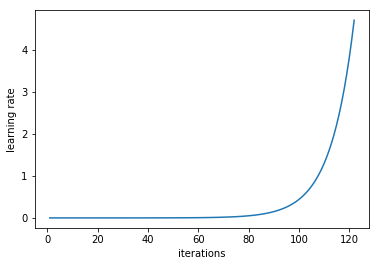

In [29]:
learner.sched.plot_lr()

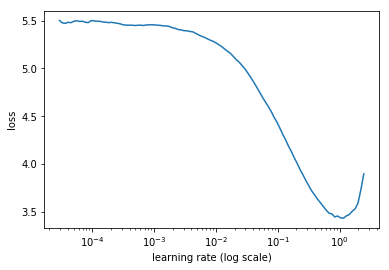

In [30]:
learner.sched.plot()

In [33]:
learner.fit(0.1, 2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.282906   0.695209   0.795499  
    1      0.789347   0.648454   0.804305                    



[array([0.64845]), 0.8043052830574797]

In [34]:
learner.fit(0.1, 5)

epoch      trn_loss   val_loss   accuracy                    
    0      0.604289   0.623702   0.818004  
    1      0.491987   0.649499   0.810665                    
    2      0.467197   0.66439    0.821918                    
    3      0.40622    0.743763   0.818004                    
    4      0.367865   0.743252   0.812622                    



[array([0.74325]), 0.8126223097808674]

In [35]:
learner.fit(0.1, 5)

epoch      trn_loss   val_loss   accuracy                    
    0      0.323866   0.769902   0.806262  
    1      0.338129   0.803499   0.806751                    
    2      0.28145    0.699081   0.818493                    
    3      0.284775   0.731507   0.819961                    
    4      0.242898   0.721783   0.816047                    



[array([0.72178]), 0.816046966498612]

In [36]:
learner.precompute=False

 92%|█████████▏| 118/128 [00:36<00:03,  3.22it/s, loss=1.75] 

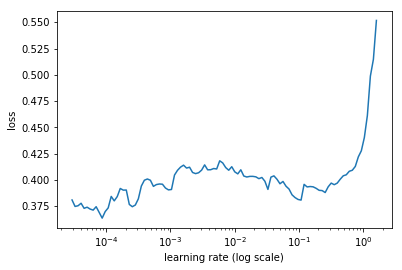

In [37]:
lr_finder = learner.lr_find()
learner.sched.plot()

In [38]:
learner.fit(1e-2, 5)

epoch      trn_loss   val_loss   accuracy                    
    0      0.3737     0.656277   0.822896  
    1      0.337391   0.633017   0.828767                    
    2      0.345996   0.625311   0.825832                    
    3      0.33062    0.610465   0.828278                    
    4      0.31186    0.606888   0.827299                    


[array([0.60689]), 0.827299413499067]

In [39]:
learner.fit(1e-2, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.311542   0.606143   0.831213  
    1      0.292474   0.601141   0.830724                    


[array([0.60114]), 0.8307240710333136]

In [40]:
learner.unfreeze()
rates = np.array([1e-4, 1e-3, 1e-2])

In [41]:
learner.fit(rates, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.490042   0.673147   0.818004  
    1      0.437024   0.643914   0.832192                    


[array([0.64391]), 0.832191780122059]

In [43]:
learner.save('unfrozen')

In [44]:
learner.load('unfrozen')

In [45]:
learner.fit(rates, 6, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.370917   0.637237   0.824853  
    1      0.348936   0.673798   0.826321                    
    2      0.269685   0.644165   0.832681                    
  4%|▍         | 5/128 [00:05<02:08,  1.04s/it, loss=0.268]

KeyboardInterrupt: 

In [4]:
image_size = 300
architecture = resnet34
transforms = tfms_from_model(architecture, image_size, aug_tfms=transforms_side_on)
data = ImageClassifierData.from_csv(PATH, 'train', csv_fname=PATH+'labels.csv', tfms=transforms, suffix='.jpg', bs=128, test_name='test')
data.resize(image_size)
learner = ConvLearner.pretrained(architecture, data, precompute=True)

In [59]:
learner.fit(1e-2, 2, cycle_len=1)
learner.save('lower_lr_precomputed')

epoch      trn_loss   val_loss   accuracy                 
    0      4.128703   3.277303   0.402153  
    1      2.886498   1.944803   0.676614                 


[array([1.9448]), 0.6766144810590725]

In [5]:
learner.precompute=False

In [61]:
learner.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                 
    0      1.986671   1.452979   0.75      
    1      1.621337   1.073371   0.80137                  
    2      1.361224   0.877667   0.821429                 


[array([0.87767]), 0.8214285730615754]

In [62]:
learner.save('lower_lr')

In [6]:
learner.load('lower_lr')

In [7]:
learner.unfreeze()
learner.fit(np.array([1e-4, 1e-3, 1e-2]), 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                 
    0      1.186483   0.769707   0.830724  
    1      0.987024   0.610186   0.84002                   
    2      0.835865   0.588309   0.847847                  



[array([0.58831]), 0.847847358354617]

In [8]:
learner.save('lower_lr_unfreeze')

In [9]:
learner.fit(np.array([1e-4, 1e-3, 1e-2]), 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.755246   0.557279   0.85225   
    1      0.702263   0.512538   0.853229                  
    2      0.625214   0.505272   0.850783                  



[array([0.50527]), 0.8507827786316844]

In [10]:
learner.save('lower_lr_unfreeze_2')

In [8]:
learner.load('lower_lr_unfreeze_2')

In [9]:
learner.unfreeze()
learner.fit(np.array([1e-4, 1e-3, 1e-2]), 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.591646   0.494909   0.85274   
    1      0.55819    0.472194   0.854697                  
    2      0.517274   0.469216   0.855186                  



[array([0.46922]), 0.8551859102137168]

In [10]:
learner.save('lower_lr_unfreeze_3')

In [11]:
learner.fit(np.array([1e-4, 1e-3, 1e-2]), 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.490992   0.46342    0.854207  
    1      0.475617   0.461135   0.857143                  
    2      0.431212   0.456029   0.854697                  



[array([0.45603]), 0.8546966734231102]

In [12]:
learner.save('lower_lr_unfreeze_overfit')

In [5]:
learner.precompute=False
learner.load('lower_lr_unfreeze_overfit')


In [6]:
log_preds = learner.predict(is_test=True)
probs = np.exp(log_preds)
probs.shape

(10357, 120)

In [7]:
ds = pd.DataFrame(probs)
ds.columns = data.classes

In [8]:
ds.insert(0, 'id', [o[5:-4] for o in data.test_ds.fnames])

In [9]:
ds.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,de084b830010b6107215fef5d4a75b94,0.000002,0.000066,7.295187e-06,0.000004,4.828959e-07,7.112968e-06,3.927862e-06,1.376604e-06,1.922881e-06,...,9.980509e-08,5.471215e-08,1.635251e-06,2.255161e-07,4.432551e-06,3.377980e-07,5.580980e-07,0.000035,0.000005,4.358875e-07
1,6b423ca7020e70eb05732843c5d2bad1,0.000394,0.000039,2.152148e-05,0.000004,9.333281e-07,2.241175e-05,2.877744e-06,1.301928e-06,1.038218e-05,...,1.325526e-06,2.191559e-07,1.711648e-07,1.346449e-06,2.098736e-07,1.884527e-05,6.435822e-05,0.000003,0.000012,2.096428e-06
2,74aa7e201e0e93e13e87b986a7d31839,0.000010,0.000017,4.779827e-06,0.025113,2.241344e-05,6.903537e-07,2.289569e-05,1.319795e-05,2.245434e-06,...,8.193670e-06,5.292981e-06,9.503880e-06,9.474939e-06,6.420640e-06,3.403904e-06,1.747971e-05,0.000485,0.660286,4.426452e-06
3,a079f72193264bc5685e5d28d7372680,0.000241,0.000008,2.758594e-05,0.000008,7.941259e-06,2.631132e-05,3.165695e-05,1.421142e-05,3.998344e-06,...,5.785922e-05,3.508952e-06,3.059886e-06,2.423049e-06,1.609569e-06,1.823485e-05,3.069706e-04,0.000004,0.000084,2.029645e-04
4,583f7580fa5fec1266331fcf83b76fd6,0.000006,0.000001,7.469943e-07,0.000276,3.133412e-07,8.169353e-07,9.810795e-08,2.342484e-07,2.788092e-07,...,1.055119e-05,2.528451e-07,1.352763e-07,3.523410e-07,4.089921e-07,5.315631e-07,5.262788e-07,0.000003,0.000348,3.215190e-06


In [10]:
ds.to_csv(f'subm.gz', compression='gzip', index=False)

In [11]:
FileLink(f'subm.gz')

/home/paperspace/fastai/courses/dl1/subm.gz